## Chap 2.6: Feature engineering


The process of feature engineering is of manipulating, transforming, selecting raw data into features that can be used in statistical analysis of prediction.

* statistical features
* temporal features
* spectral features (Fourier and Wavelet transforms)

We will first calculate some of the features individually on a seismic data set, then we will use a python toolbox to calculate them automatically.

In [2]:
# Import modules for seismic data and feature extraction

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.stats as st

# time series feature extraction python toolbox:
import tsfresh

# seismic python toolbox
import obspy
import obspy.clients.fdsn.client as fdsn
from obspy import UTCDateTime



First, we download seismic data from Puget Sound for a large M8.2 earthquake that happened in Alaska, July 29, 2021.

In [3]:
# Download seismic data
network = 'UW'
station = 'RATT'
channel = 'HHZ'# this channel gives a low frequency, 1Hz signal.
Tstart = UTCDateTime(2021,7,29,6,15)
Tend = Tstart+7200# UTCDateTime(year=2022, month=10, day=8)
fdsn_client = fdsn.Client('IRIS')
Z = fdsn_client.get_waveforms(network=network, station=station, location='--', channel=channel, starttime=Tstart, \
    endtime=Tend, attach_response=True)
Z.detrend()
Z.merge()

1 Trace(s) in Stream:
UW.RATT..HHZ | 2021-07-29T06:15:00.000001Z - 2021-07-29T08:15:00.000001Z | 100.0 Hz, 720001 samples

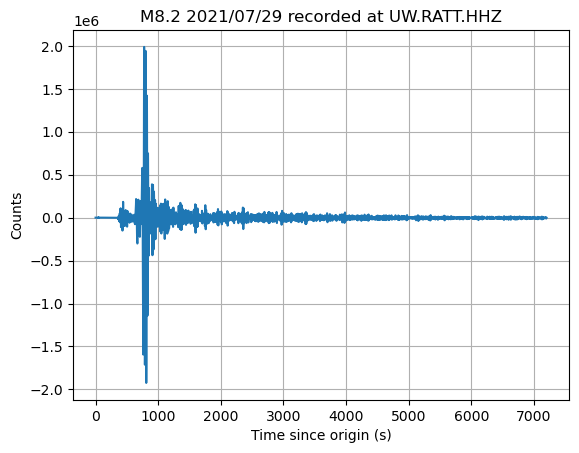

In [4]:
# plot the time series
T = np.linspace(0,(Tend-Tstart),Z[0].stats.npts)
plt.plot(T,Z[0].data)
plt.grid(True)
plt.xlabel('Time since origin (s)')
plt.title('M8.2 2021/07/29 recorded at UW.RATT.HHZ')
plt.ylabel('Counts')
plt.show()


Now, only seismologists work on obspy stream, so we will convert the data into numpy arrays:

In [5]:
z = np.asarray(Z[0].data)

To calculate the statistical features of the data, we will first look at the data distribution, P(z):

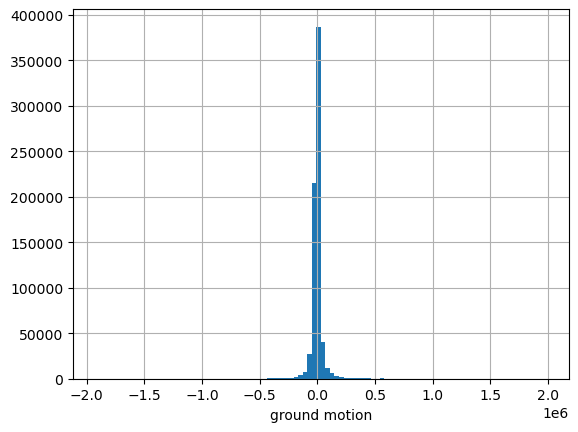

In [10]:
p = plt.hist(z,100);plt.grid(True);plt.xlabel('ground motion');plt.show()

We now calculated the distribution of the data, ``p``, in 100 bins.

## 2.6.2 Statistical Features

Let be $P(z)$ the distribution of the data $z$.

### The mean
<div>
<img src="mean.png" alt="mean" height=300  />
</div>

Image taken from this [blog](!https://gregorygundersen.com/blog/2020/04/11/moments).

The mean is the sum of the values divided by the number of data points. It is the first raw moment of a distribution. 
$\mu = \int_{-\infty}^\infty zP(z)dz$, where z the ground motion value (bin) and $P(z)$ is the distribution of the data.

### The Variance
 <div>
<img src="variance.png" alt="variance" height=200  />
</div>

The variance is the second *centralized* moment. *Centralized* means that the distribution is shifted around the mean. It calculates how spread out is a distribution.

$\sigma^2 = \int_{-\infty}^\infty (z-\mu)^2P(z)dz$

The standard deviation is the square root of the variance, $\sigma$. A high variance indicates a wide distribution.

### The skewness

Skewness is the third *standardized* moment. The *standardized* moment is scaled by the standard deviation. It measures the relative size of the two tails of the distribution.


$m_3= \int_{-\infty}^\infty \frac{(z - \mu)^3}{\sigma^3}P(z)dz$

With the cubic exponent, it is possible that the skewness is negative.

 <div>
<img src="skewness.png" alt="skewness" height=200  />
</div>

Image taken from this [blog](!https://gregorygundersen.com/blog/2020/04/11/moments).

A positively skewed distribution is one where most of the weight is at the end of the distribution. A negatively skewed distribution is one where most of the weight is at the beginning of the distribution.


### Kurtosis

Kurtosis measures the combine size of the two tails relative to the whole distribution. It is the fourth centralized and standardized moment.

$m_4= \int_{-\infty}^\infty (\frac{z-\mu}{\sigma})^4P(z)dz$

 <div>
<img src="kurtosis.png" alt="kurtosis" height=200  />
</div>
The laplace, normal, and uniform distributions have a mean of 0 and a variance of 1. But their kurtosis is 3, 0, and -1.2.


Python functions to calculate the moments might be:

In [12]:
def raw_moment(X, k, c=0):
    return ((X - c)**k).mean()

def central_moment(X, k):
    return raw_moment(X=X, k=k, c=X.mean())


We can now calculate the mean, variance, skewness, and kurtosis of the data:


In [13]:
# enter answers here using the functions for the moment.
# the mean:

# the variance:

# the skewness

# the kurtosis



We will now use explore the distribution of the data and extract features using scipy.

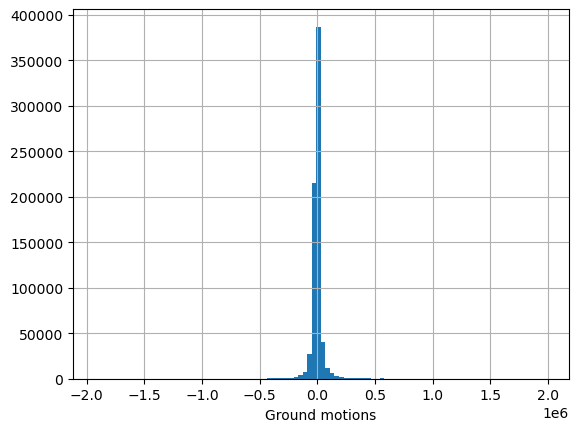

In [20]:
plt.hist(z,100);plt.xlabel('Ground motions');plt.grid(True);plt.show()

The data is mostly centered at zero, mostly small nubmers, but there seems to be tails to the distribution. Let's calculate statistical features:

In [21]:
print('The mean and variance are %4.2f and %4.2f' %(np.mean(z),np.std(z)))

The mean and variance are -1970.03 and 138059.72
